In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sheet_path = 'C:/Users/lucas.lucca/Desktop/AVs/AV3/Cópia de Tabela 6.1 (EstratoGeog).xls'

In [7]:
df = pd.DataFrame()

In [8]:
cols = ['Nome', 'total (1000 pessoas)',
       'Nível de ocupação das pessoas de 14 anos de idade ou mais (%)',
       'Taxa de desocupação das pessoas de 14 anos de idade ou mais (%)',
       'Proporção de pessoas com rendimento domiciliar per capita abaixo de US$ 6,85 PPC 2017 (%)',
       'Proporção de pessoas vivendo em domicílios com esgotamento por rede coletora ou pluvial (%)',
       'Proporção de pessoas vivendo em domicílios com máquina de lavar roupa (%)',
       'Proporção de pessoas vivendo em domicílios com acesso à Internet (%)',
       'Proporção de pessoas de 18 a 29 anos de idade com no mínimo 12 anos de\nestudo (%)']

In [9]:
for i in ['2023', '2022', '2021', '2020', '2019']:
    dt = pd.read_excel(sheet_path, sheet_name=i)
    dt.columns = cols
    dt['Ano'] = i
    df = pd.concat([df, dt], ignore_index=True)
    del dt

In [30]:
df.to_csv('estrato_geografico.csv', index=False, encoding='utf-8-sig')

In [10]:
df

,Nome,total (1000 pessoas),Nível de ocupação das pessoas de 14 anos de idade ou mais (%),Taxa de desocupação das pessoas de 14 anos de idade ou mais (%),"Proporção de pessoas com rendimento domiciliar per capita abaixo de US$ 6,85 PPC 2017 (%)",Proporção de pessoas vivendo em domicílios com esgotamento por rede coletora ou pluvial (%),Proporção de pessoas vivendo em domicílios com máquina de lavar roupa (%),Proporção de pessoas vivendo em domicílios com acesso à Internet (%),Proporção de pessoas de 18 a 29 anos de idade com no mínimo 12 anos de\nestudo (%),Ano
0,Brasil,215602.317008,57.600005,7.755964,27.366993,67.920392,70.777958,92.943625,73.110318,2023
1,Porto-Velho,566.733000,52.024176,4.372144,27.949107,48.301162,88.534601,95.379771,73.983769,2023
2,Vilhena,433.360999,52.882835,1.654324,22.615413,43.371515,92.961379,94.615318,63.473197,2023
3,Ariquemes/Ji-Paraná,840.472001,58.443918,3.076056,22.957235,8.295497,67.124933,94.403414,65.485250,2023
4,Rio Branco,431.320000,50.005031,9.346129,43.452910,81.106536,78.540753,91.870826,72.893202,2023
...,...,...,...,...,...,...,...,...,...,...
730,Integrada de Brasília em Goiás,1284.404000,55.158604,19.838596,42.199371,39.46521,70.985006,88.93673,65.590705,2019
731,Norte de Goiás,504.584266,52.682366,12.872904,41.259439,34.910126,54.06877,68.134824,63.683069,2019
732,Sul de Goiás,1461.414961,63.342027,7.509531,22.440470,72.178885,79.343532,89.766284,66.386625,2019
733,Centro-Oeste de Goiás,1163.642774,57.524420,8.548573,24.804900,59.648014,77.940312,84.635984,63.549617,2019


In [ ]:
sns.

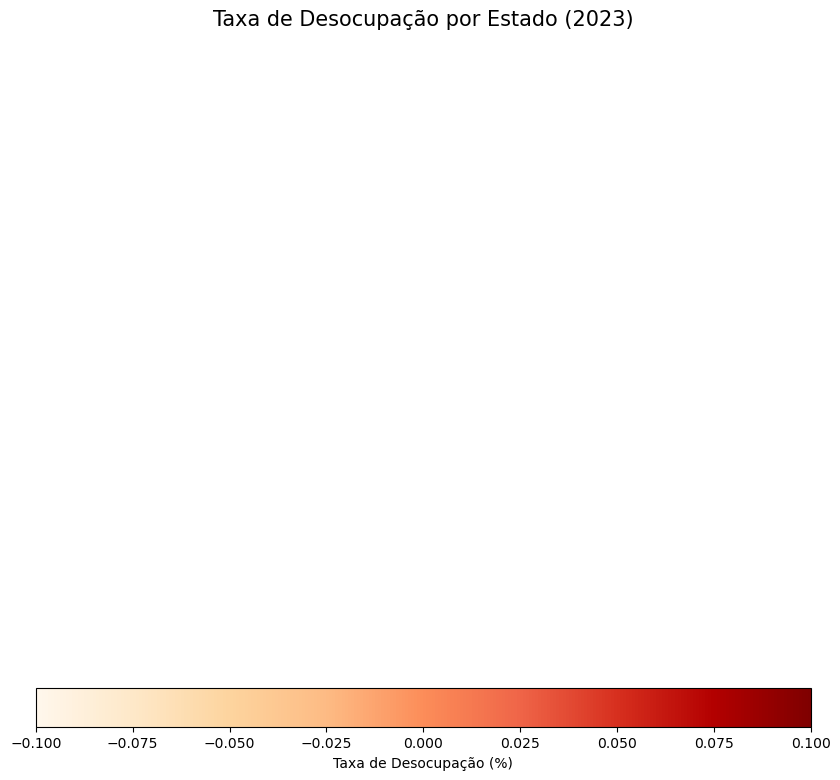

In [11]:
df['Estado'] = df['Nome'].str.split('/').str[-1].str.strip()

# Agrupar por estado e calcular a média de uma coluna (ex: 'Taxa de desocupação das pessoas de 14 anos de idade ou mais (%)')
dados_por_estado = df.groupby('Estado')['Taxa de desocupação das pessoas de 14 anos de idade ou mais (%)'].mean().reset_index()

# 3. Carregar os dados geográficos dos estados brasileiros
# Você pode baixar um shapefile ou GeoJSON dos estados brasileiros (ex: do IBGE)
# Exemplo de URL para um GeoJSON dos estados brasileiros:
url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
gdf_estados = gpd.read_file(url_geojson)

# Renomear a coluna de sigla do estado para corresponder ao seu DataFrame (se necessário)
gdf_estados.rename(columns={'sigla': 'Estado'}, inplace=True)

# 4. Combinar os dados geográficos com os dados processados
gdf_estados = gdf_estados.merge(dados_por_estado, on='Estado', how='left')

# 5. Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf_estados.plot(column='Taxa de desocupação das pessoas de 14 anos de idade ou mais (%)', 
                 cmap='OrRd', 
                 linewidth=0.8, 
                 ax=ax, 
                 edgecolor='0.8', 
                 legend=True,
                 legend_kwds={'label': "Taxa de Desocupação (%)", 'orientation': "horizontal"})

# Adicionar rótulos dos estados
for idx, row in gdf_estados.iterrows():
    plt.annotate(text=row['Estado'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)

# Configurações do mapa
ax.set_title('Taxa de Desocupação por Estado (2023)', fontsize=15)
ax.axis('off')

plt.show()

In [10]:
df_23 = pd.read_excel(sheet_path, sheet_name='2023' )
df_22 = pd.read_excel(sheet_path, sheet_name='2022' )
df_21 = pd.read_excel(sheet_path, sheet_name='2021' )
df_20 = pd.read_excel(sheet_path, sheet_name='2020' )
df_19 = pd.read_excel(sheet_path, sheet_name='2019' )

In [7]:
!pip install xlrd